## K-Means Clustering

**Overview**<br>
<a href="https://archive.ics.uci.edu/ml/datasets/online+retail">Online retail is a transnational data set</a> which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The steps are broadly:
1. Read and understand the data
2. Clean the data
3. Prepare the data for modelling
4. Modelling
5. Final analysis and reco

# 1. Read and visualise the data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [20]:
# read the dataset
retail_df = pd.read_csv("Cricket.csv", sep=",", encoding="ISO-8859-1")
retail_df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [21]:
# basics of the df
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
Player    79 non-null object
Span      79 non-null object
Mat       79 non-null int64
Inns      79 non-null int64
NO        79 non-null int64
Runs      79 non-null int64
HS        79 non-null object
Ave       79 non-null float64
BF        79 non-null int64
SR        79 non-null float64
100       79 non-null int64
50        79 non-null int64
0         79 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


# 2. Clean the data

In [22]:
# missing values
round(100*(retail_df.isnull().sum())/len(retail_df), 2)

Player    0.0
Span      0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
dtype: float64

In [26]:
# drop all rows having missing values
retail_df = retail_df[['Player','SR', 'Ave']]
retail_df.shape

(79, 3)

In [27]:
retail_df.head()

,Player,SR,Ave
0,SR Tendulkar (INDIA),86.23,44.83
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98
2,RT Ponting (AUS/ICC),80.39,42.03
3,ST Jayasuriya (Asia/SL),91.20,32.36
4,DPMD Jayawardene (Asia/SL),78.96,33.37


# 3. Prepare the data for modelling

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [28]:
# 2. rescaling
rfm_df = retail_df[['SR', 'Ave']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [29]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['SR', 'Ave']
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


# 4. Modelling

In [30]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [396]:
kmeans.labels_

array([3, 1, 0, ..., 3, 0, 0], dtype=int32)

In [397]:
# help(KMeans)

## Finding the Optimal Number of Clusters

### SSD

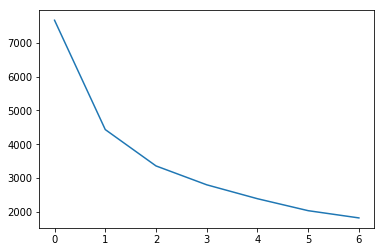

In [398]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [399]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4814786837400834
For n_clusters=5, the silhouette score is 0.4658529685822305
For n_clusters=6, the silhouette score is 0.41707960376211345
For n_clusters=7, the silhouette score is 0.4158077420309644
For n_clusters=8, the silhouette score is 0.4059904161107271


In [400]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [401]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1], dtype=int32)

In [35]:
# assign the label
retail_df['cluster_id'] = kmeans.labels_

retail_df[retail_df['cluster_id']==2]

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,2
13,MS Dhoni (Asia/INDIA),88.69,51.32,2
15,AB de Villiers (Afr/SA),100.25,53.55,2
25,V Kohli (INDIA),90.99,53.94,2
34,HM Amla (SA),89.05,50.25,2
38,MG Bevan (AUS),74.16,53.58,2
42,IVA Richards (WI),90.20,47.00,2
63,MJ Guptill (NZ),87.73,43.30,2
64,MEK Hussey (AUS),87.16,48.15,2


In [40]:
for x in [0,1,2,3]:
    print('-'*50)
    print(x)
    print('-'*50)
    
    print(retail_df[retail_df['cluster_id']==x])

--------------------------------------------------
0
--------------------------------------------------
                         Player     SR    Ave  cluster_id
1   KC Sangakkara (Asia/ICC/SL)  78.86  41.98           0
2          RT Ponting (AUS/ICC)  80.39  42.03           0
5     Inzamam-ul-Haq (Asia/PAK)  74.24  39.52           0
6        JH Kallis (Afr/ICC/SA)  72.89  44.36           0
7       SC Ganguly (Asia/INDIA)  73.70  41.02           0
8     R Dravid (Asia/ICC/INDIA)  71.24  39.16           0
9              BC Lara (ICC/WI)  79.51  40.48           0
11   Mohammad Yousuf (Asia/PAK)  75.10  41.71           0
18            Saeed Anwar (PAK)  80.67  39.21           0
19           S Chanderpaul (WI)  70.74  41.60           0
21               DL Haynes (WI)  63.09  41.37           0
23               ME Waugh (AUS)  76.90  39.35           0
29              MJ Clarke (AUS)  78.98  44.58           0
32          Javed Miandad (PAK)  67.01  41.70           0
37            GC Smith (Af

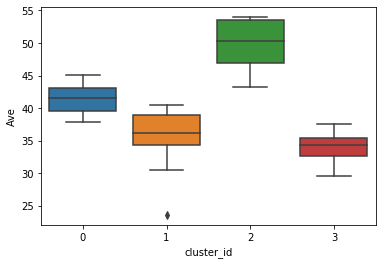

In [37]:
# plot
sns.boxplot(x='cluster_id', y='Ave', data=retail_df)


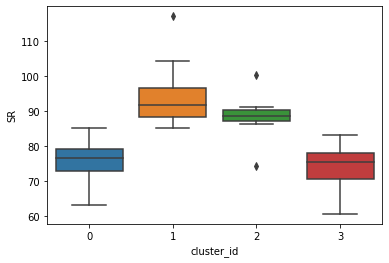

In [38]:
# plot
sns.boxplot(x='cluster_id', y='SR', data=retail_df)

## Hierarchical Clustering

In [41]:
rfm_df_scaled.head()

,SR,Ave
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185


In [43]:
retail_df.head()

,Player,SR,Ave,cluster_id
0,SR Tendulkar (INDIA),86.23,44.83,2
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,0
2,RT Ponting (AUS/ICC),80.39,42.03,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,3


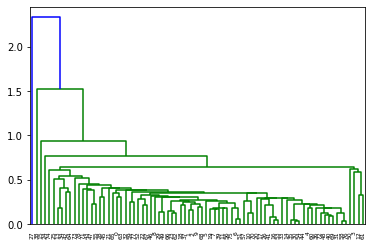

In [44]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

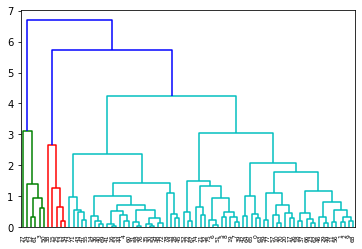

In [45]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [48]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2])

In [49]:
# assign cluster labels
retail_df['cluster_labels'] = cluster_labels
retail_df.head()

,Player,SR,Ave,cluster_id,cluster_labels
0,SR Tendulkar (INDIA),86.23,44.83,2,0
1,KC Sangakkara (Asia/ICC/SL),78.86,41.98,0,0
2,RT Ponting (AUS/ICC),80.39,42.03,0,0
3,ST Jayasuriya (Asia/SL),91.20,32.36,1,1
4,DPMD Jayawardene (Asia/SL),78.96,33.37,3,2


In [51]:
for x in [0,1,2,3]:
    print('-'*50)
    print(x)
    print('-'*50)
    
    print(retail_df[retail_df['cluster_labels']==x])

--------------------------------------------------
0
--------------------------------------------------
                         Player     SR    Ave  cluster_id  cluster_labels
0          SR Tendulkar (INDIA)  86.23  44.83           2               0
1   KC Sangakkara (Asia/ICC/SL)  78.86  41.98           0               0
2          RT Ponting (AUS/ICC)  80.39  42.03           0               0
5     Inzamam-ul-Haq (Asia/PAK)  74.24  39.52           0               0
6        JH Kallis (Afr/ICC/SA)  72.89  44.36           0               0
7       SC Ganguly (Asia/INDIA)  73.70  41.02           0               0
8     R Dravid (Asia/ICC/INDIA)  71.24  39.16           0               0
9              BC Lara (ICC/WI)  79.51  40.48           0               0
10              TM Dilshan (SL)  86.23  39.27           1               0
11   Mohammad Yousuf (Asia/PAK)  75.10  41.71           0               0
17            CH Gayle (ICC/WI)  85.11  37.33           1               0
18      

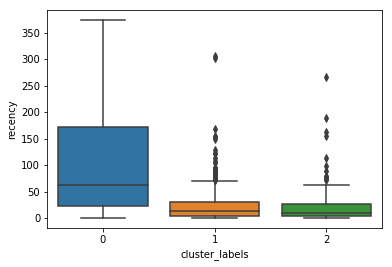

In [419]:
# plots
sns.boxplot(x='cluster_labels', y='recency', data=grouped_df)

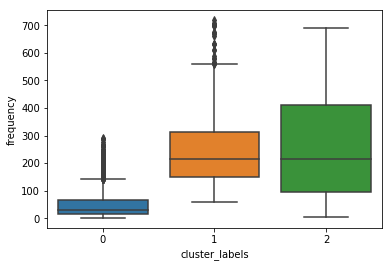

In [420]:
# plots
sns.boxplot(x='cluster_labels', y='frequency', data=grouped_df)

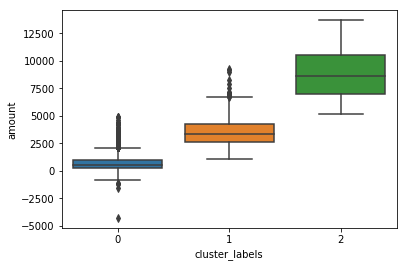

In [421]:
# plots
sns.boxplot(x='cluster_labels', y='amount', data=grouped_df)